# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je 13. 5. 2024, 23:59:59**, pokud odevzdáte úkol do 20. 5. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

Naimportujeme vše potřebné a přiřadíme proměnné `device` grafickou kartu, na které bude probíhat trénování modelů pro urychlení procesu.

In [355]:
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

rd_seed = 999

if torch.cuda.is_available():
    # Set the CUDA device to 0 (the first GPU)
    torch.cuda.set_device(0)
    device = torch.device("cuda:0")
    print("CUDA device set to:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU instead.")

CUDA device set to: NVIDIA GeForce RTX 2060


In [356]:
# Load the dataset from the CSV file into a pandas DataFrame
pictures = pd.read_csv("train.csv")

In [357]:
# Print basic information about the DataFrame
pictures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Columns: 1025 entries, pix1 to label
dtypes: int64(1025)
memory usage: 410.6 MB


In [358]:
unique_labels = np.sort(pictures["label"].unique())
print(f'Unique image labels: {unique_labels}')

Unique image labels: [0 1 2 3 4 5 6 7 8 9]


Vykreslíme první obrázky, které odpovídají jednomu z labelů.

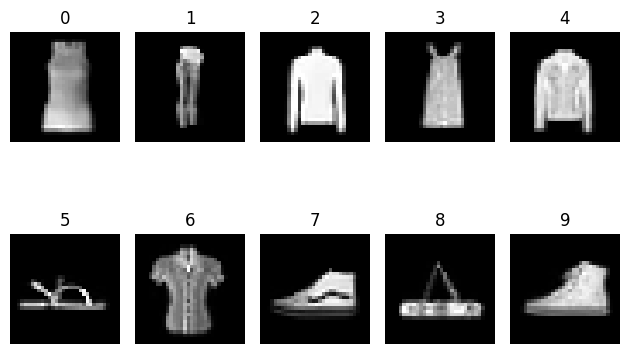

In [439]:
images = []
for i, label in enumerate(unique_labels):
    # Find the first image with the current label
    image = pictures[pictures['label'] == label].iloc[0, 0:1024].values.reshape(32, 32)
    images.append(image)

    # Displaying the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(str(label))
    plt.axis('off')

plt.tight_layout()
plt.show()

Význam každého lablu:
   0. Tričko/top
   1. Kalhoty
   2. Svetr
   3. Šaty
   4. Kabát
   5. Sandál
   6. Košile
   7. Teniska
   8. Taška
   9. Kotníková obuv

Nejprve provedeme některé přípravné akce:
* Data rozdělíme do tří částí: trénovací, validační a testovací v poměru 60/24/16 %.
* Vytvoříme kopie datasetu, které budou normalizovány pomocí MinMax normalizace a standartizace.
* Připravíme funkce, které budou při řešení tohoto úkolu nezbytné.

In [360]:
# Split the training dataset into 60% train and 40% rest
Xtrain, Xrest, ytrain, yrest = train_test_split(pictures.drop(columns=['label']), pictures.label, test_size=0.4, random_state = rd_seed)

# Split the rest of the data into 0.6*0.4=24% validation, 0.4*0.4=16% test
Xtest, Xval, ytest, yval = train_test_split(Xrest, yrest, test_size=0.6, random_state = rd_seed)

print(f"Train rozměry, X: {Xtrain.shape}, y: {ytrain.shape}")
print(f"Val rozměry, X: {Xval.shape}, y: {yval.shape}")
print(f"Test rozměry, X: {Xtest.shape}, y: {ytest.shape}")

Train rozměry, X: (31500, 1024), y: (31500,)
Val rozměry, X: (12600, 1024), y: (12600,)
Test rozměry, X: (8400, 1024), y: (8400,)


In [361]:
# Fit the StandardScaler to the training data
standard_scaler = StandardScaler().fit(Xtrain)

# Transform the training, validation, and test data using the fitted scaler
Xtrain_standard = standard_scaler.transform(Xtrain)
Xval_standard = standard_scaler.transform(Xval)
Xtest_standard = standard_scaler.transform(Xtest)

In [362]:
print(Xtrain_standard.shape)

(31500, 1024)


In [363]:
# Fit the MinMaxScaler to the training data
minMax_scaler = MinMaxScaler().fit(Xtrain)

# Transform the training, validation, and test data using the fitted scaler
Xtrain_minMax = minMax_scaler.transform(Xtrain)
Xval_minMax = minMax_scaler.transform(Xval)
Xtest_minMax = minMax_scaler.transform(Xtest)

In [364]:
print(Xtrain_minMax.shape)

(31500, 1024)


Změníme rozměry pole s obrázkovými daty na standardní formát [N,C,H,W], kde
* N - je počet obrázků (datových bodů)
* C - je počet kanálů (u stupňu šedi pouze jeden, u RGB 3)
* H - počet pixelů na výšku
* W - počet pixelů na šířku

In [365]:
numpy_Xtrain = Xtrain.values
numpy_ytrain = ytrain.values
numpy_Xval = Xval.values
numpy_yval = yval.values
numpy_Xtest = Xtest.values
numpy_ytest = ytest.values

In [366]:
numpy_Xtrain = numpy_Xtrain.reshape(-1, 1, 32, 32)
numpy_Xval = numpy_Xval.reshape(-1, 1, 32, 32)
numpy_Xtest = numpy_Xtest.reshape(-1, 1, 32, 32)

Xtrain_standard = Xtrain_standard.reshape(-1, 1, 32, 32)
Xval_standard = Xval_standard.reshape(-1, 1, 32, 32)
Xtest_standard = Xtest_standard.reshape(-1, 1, 32, 32)

Xtrain_minMax = Xtrain_minMax.reshape(-1, 1, 32, 32)
Xval_minMax = Xval_minMax.reshape(-1, 1, 32, 32)
Xtest_minMax = Xtest_minMax.reshape(-1, 1, 32, 32)

In [367]:
print(numpy_Xtrain.shape, numpy_ytrain.shape)

(31500, 1, 32, 32) (31500,)


Nyní je třeba vše převést na datový typ `torch.Tensor`.

In [368]:
Xtrain = torch.tensor(numpy_Xtrain, dtype=torch.float)
ytrain = torch.tensor(numpy_ytrain, dtype=torch.long)
Xval = torch.tensor(numpy_Xval, dtype=torch.float)
yval = torch.tensor(numpy_yval, dtype=torch.long)
Xtest = torch.tensor(numpy_Xtest, dtype=torch.float)
ytest = torch.tensor(numpy_ytest, dtype=torch.long)

In [369]:
Xtrain_standard = torch.tensor(Xtrain_standard, dtype=torch.float)
Xval_standard = torch.tensor(Xval_standard, dtype=torch.float)
Xtest_standard = torch.tensor(Xtest_standard, dtype=torch.float)

In [370]:
Xtrain_minMax = torch.tensor(Xtrain_minMax, dtype=torch.float)
Xval_minMax = torch.tensor(Xval_minMax, dtype=torch.float)
Xtest_minMax = torch.tensor(Xtest_minMax, dtype=torch.float)

Nyní použijeme `torch.utils.data.TensorDataset`.

In [371]:
train_data = torch.utils.data.TensorDataset(Xtrain, ytrain)
val_data = torch.utils.data.TensorDataset(Xval, yval)
test_data = torch.utils.data.TensorDataset(Xtest, ytest)

train_data_MinMax = torch.utils.data.TensorDataset(Xtrain_minMax, ytrain)
val_data_MinMax = torch.utils.data.TensorDataset(Xval_minMax, yval)
test_data_MinMax = torch.utils.data.TensorDataset(Xtest_minMax, ytest)

train_data_standard = torch.utils.data.TensorDataset(Xtrain_standard, ytrain)
val_data_standard = torch.utils.data.TensorDataset(Xval_standard, yval)
test_data_standard = torch.utils.data.TensorDataset(Xtest_standard, ytest)

In [372]:
print("The length of train data is:",len(train_data))
print("The length of val data is:",len(val_data))
print("The length of test data is:",len(test_data))

The length of train data is: 31500
The length of val data is: 12600
The length of test data is: 8400


Připravíme dávkovač, který je schopný při trénování dodávat dávky. Použijeme k tomu `torch.utils.data.DataLoader`.

In [373]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

train_loader_standard = torch.utils.data.DataLoader(train_data_standard, batch_size=32, shuffle=True)
val_loader_standard = torch.utils.data.DataLoader(val_data_standard, batch_size=128, shuffle=False)
test_loader_standard = torch.utils.data.DataLoader(test_data_standard, batch_size=128, shuffle=False)

train_loader_MinMax = torch.utils.data.DataLoader(train_data_MinMax, batch_size=32, shuffle=True)
val_loader_MinMax = torch.utils.data.DataLoader(val_data_MinMax, batch_size=128, shuffle=False)
test_loader_MinMax = torch.utils.data.DataLoader(test_data_MinMax, batch_size=128, shuffle=False)

In [375]:
# code from tutorial
def validationPerformance(loader, model, device=torch.device('cuda:0')):
    """
    Calculate validation performance metrics (accuracy and average loss) for a PyTorch model using a specified data loader.

    Args:
    loader (torch.utils.data.DataLoader): DataLoader object providing batches of validation data.
    model (torch.nn.Module): The PyTorch model to evaluate.
    device (torch.device, optional): Device to use for model evaluation (default is 'cuda:0' if available).

    Returns:
    float: Validation accuracy.
    float: Average validation loss.
    """
    running_cum_vloss = 0.0
    vcorrect = 0
    for i, vdata in enumerate(loader):
        vinputs, vlabels = vdata
        vinputs, vlabels = vinputs.to(device), vlabels.to(device)
        with torch.no_grad():
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
        running_cum_vloss += vloss * vinputs.shape[0]
        # count the correctly classified samples
        vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
    # Get average loss and accuraccy
    avg_vloss = running_cum_vloss / len(val_data)
    vacc = vcorrect / len(val_data)
    return vacc, avg_vloss

In [376]:
# code from tutorial
def bestModelPerformance(model, ii):
    """
    Evaluate a PyTorch model on a validation dataset and collect predictions and labels.
    
    Args:
    model (torch.nn.Module): The PyTorch model to evaluate.
    ii (int): Index to track the position in the predictions and labels arrays.
    """
    for vdata in tqdm(val_loader_standard):
        vinputs, vlabels = vdata
        vinputs, vlabels = vinputs.to(device), vlabels.to(device)
        with torch.no_grad():
            voutputs = model(vinputs)
        val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
        val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()
        ii += vinputs.shape[0]

In [386]:
def showTrainingProcess():
    """
    Display a plot of training and validation metrics (loss and accuracy) over epochs.
    """
    plt.plot(epochs,train_loss, '.-', markersize = 10, label='Train loss')
    plt.plot(epochs,validation_loss, '.-', markersize = 10, label='Validation loss')
    plt.plot(epochs,validation_accuracy, '.-', color='purple',  markersize = 10, label='Validation accuracy')
    plt.plot([epochs[np.argmax(validation_accuracy)]], [validation_accuracy[np.argmax(validation_accuracy)]],'x', color = 'green', markersize = 10, label='Best validation accuracy')
    if early_stopped:
        plt.plot([epochs[np.argmax(validation_accuracy) + K_EPOCHS]], [validation_accuracy[np.argmax(validation_accuracy) + K_EPOCHS]],'x', color = 'red', markersize = 10, label='Early stopping')
    plt.legend()
    plt.xlabel('Epochs')
    plt.title('Training and Validation Metrics')
    plt.show()

In [378]:
# code from tutorial
def train_one_epoch(model, loss_fn, optimizer, training_loader, lreg = False, l_alpha = 0.1):
    """
    Train the model for one epoch using the specified loss function, optimizer, and data loader.

    Args:
        model (nn.Module): The neural network model to train.
        loss_fn: The loss function used for training.
        optimizer: The optimizer used for updating model parameters.
        training_loader (DataLoader): The DataLoader object providing training data.
        lreg (bool, optional): Whether to apply L1 regularization. Default is False.
        l_alpha (float, optional): Regularization strength (lambda). Default is 0.1.

    Returns:
        float: Average loss for the epoch.
    """
    running_cum_loss = 0.

    # tqdm is used for nice progress visualisation
    for data in tqdm(training_loader, total=len(training_loader)):
        # Every data instance is an input + label pair
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)

        if lreg:
            # compute the penalization
            l_reg = torch.tensor(0., device = device)
            l_reg += torch.linalg.vector_norm(model.fco.weight.flatten(),1)
            loss = loss + l_alpha*l_reg

        # Backpropagation
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        last_mean_loss = loss.item()
        running_cum_loss += last_mean_loss * inputs.shape[0]

    # Return of the average over the whole training set
    return running_cum_loss / len(train_data)

Jako ztrátovou funkci použijeme kategorickou relativní entropii, která defaultně pro každou dávku vrátí průměrnou hodnotu ztrátové funkce na dané dávce.

In [379]:
loss_fn = nn.CrossEntropyLoss()

## Forward Neural Network

Výhody tohoto modelu:
1. **Jednoduchá architektura**: Model ForwardNN je vhodný pro jednoduché úlohy, kde není zapotřebí složitá architektura s více vrstvami. Pokud máte na základě oblečení provádět základní klasifikaci nebo predikci, ForwardNN poskytuje jednoduchý způsob, jak začít.
2. **Rychlý experiment**: Pokud se snažíte rychle provést experiment s jednoduchým modelem a získat základní pochopení chování neuronové sítě v kontextu vaší úlohy s oblečením, ForwardNN umožňuje rychlé nasazení bez nutnosti složitějšího nastavování.
3. **Snadná interpretace výsledků**: ForwardNN poskytuje transparentní interpretaci výsledků. Protože se jedná o jednoduchý model, je snazší porozumět jeho rozhodovacímu procesu a interpretovat výstupy. To může být užitečné zejména v rané fázi analýzy dat.

* Po provedených experimentech s různou hloubkou modelu a různým počtem neuronů v každé vrstvě se ukázalo, že pro daný úkol byl nejlepším modelem síť s 3 skrytými vrstvami obsahujícími postupně 64, 32 a 16 neuronů.
* Skryté vrstvy s 64, 32 a 16 neurony poskytují síti dostatečnou kapacitu k naučení složitých vzorů ve vstupních datech. Větší počet neuronů umožňuje síti extrahovat více abstraktních a detailních rysů z dat, což může být klíčové pro úspěšné učení a generalizaci.
* Tři skryté vrstvy poskytují vhodnou míru komplexity modelu pro zpracování daného úkolu (máme relativně malý dataset a snadný úkol). Přidání více vrstev a neuronů může vést k příliš složitému modelu s tendencí k přeučení (overfitting), zatímco málo vrstev nebo neuronů může být nedostatečné k efektivnímu učení.

In [466]:
class ForwardNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32, 64)
        # self.fc2 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fco = nn.Linear(16, 10)
        
    def forward(self, x):
        x = x.flatten(start_dim = 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # x = F.relu(self.fc4(x))
        x = self.fco(x)
        return x
    
model = ForwardNN().to(device)

Po několika experimentech se nejlepší metodou optimalizace pro daný úkol ukázal `Adam`.

In [381]:
optimizer = torch.optim.Adam(model.parameters())
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Nyní natrénujeme model s použitím techniky regularizace **"Early stopping"** pomocí následujícího kódu, který:
1. Nastaví se počet epoch (**EPOCHS**), počet epoch bez zlepšení (**K_EPOCHS**), a další proměnné pro sledování průběhu trénování a validace.
2. Pro každou epochu se provedou následující kroky:
    * Nastaví se model do trénovacího režimu .
    * Provede se jeden trénovací krok na trénovacích datech, který spočítá průměrnou ztrátu během trénování.
    * Nastaví se model do režimu evaluace.
    * Zavolá se funkce **validationPerformance**, která vyhodnotí model na validačních datech a vrátí přesnost a průměrnou ztrátu.
3. Pro každou epochu se uloží statistiky jako epocha, ztráta při trénování, ztráta při validaci, a přesnost validace.
4. Pokud přesnost validace v aktuální epochě překoná dosavadní nejlepší přesnost, uloží se stav modelu jako nejlepší, a aktualizuje se hodnota **best_val_acc**.
5. Pokud počet epoch od posledního zlepšení překročí definovaný limit, učení se ukončí a nastaví se příznak **early_stopped** na **True**.

In [382]:
# code from tutorial (partially)

EPOCHS = 20

# The number of epochs without improvement before deciding to stop the learning process.
K_EPOCHS = 5
early_stopped = False

epochs = []
train_loss = []
validation_loss = []
validation_accuracy = []
best_val_acc = -1
FNN_acc = None
epochs_from_best = 0


for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch + 1))

    # Indicate training phase
    model.train(True)

    # One training step
    avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader_standard)

    # Indicate evaluation phase
    model.train(False)

    # Validation performance
    vacc, avg_vloss = validationPerformance(val_loader_standard, model)
    
    # Collect values
    epochs.append(epoch + 1)
    validation_accuracy.append(vacc)
    validation_loss.append(avg_vloss)
    train_loss.append(avg_loss)

    print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuraccy: {vacc:.3f}")

    # Track the best validation accuracy, and save the model's state
    if vacc > best_val_acc:
        print("Saving best model")
        best_val_acc = vacc
        FNN_acc = vacc
        model_path = "saves/best_model.pt"
        os.makedirs(os.path.dirname(model_path), exist_ok=True)
        torch.save(model.state_dict(), model_path)
        epochs_from_best = 0
    else:
        print("No improvement in this epoch.")
        epochs_from_best += 1

    # EARLY STOPPING
    if epochs_from_best >= K_EPOCHS:
        print("Early stopping now")
        early_stopped = True
        break

EPOCH 1:


100%|██████████| 985/985 [00:05<00:00, 168.99it/s]


TRAIN loss: 0.791, VALIDATION loss: 0.618, accuraccy: 0.774
Saving best model
EPOCH 2:


100%|██████████| 985/985 [00:05<00:00, 181.11it/s]


TRAIN loss: 0.559, VALIDATION loss: 0.575, accuraccy: 0.789
Saving best model
EPOCH 3:


100%|██████████| 985/985 [00:04<00:00, 207.00it/s]


TRAIN loss: 0.500, VALIDATION loss: 0.531, accuraccy: 0.812
Saving best model
EPOCH 4:


100%|██████████| 985/985 [00:05<00:00, 190.39it/s]


TRAIN loss: 0.460, VALIDATION loss: 0.534, accuraccy: 0.816
Saving best model
EPOCH 5:


100%|██████████| 985/985 [00:04<00:00, 200.95it/s]


TRAIN loss: 0.433, VALIDATION loss: 0.527, accuraccy: 0.817
Saving best model
EPOCH 6:


100%|██████████| 985/985 [00:05<00:00, 192.18it/s]


TRAIN loss: 0.405, VALIDATION loss: 0.509, accuraccy: 0.823
Saving best model
EPOCH 7:


100%|██████████| 985/985 [00:05<00:00, 190.69it/s]


TRAIN loss: 0.384, VALIDATION loss: 0.504, accuraccy: 0.825
Saving best model
EPOCH 8:


100%|██████████| 985/985 [00:04<00:00, 205.55it/s]


TRAIN loss: 0.367, VALIDATION loss: 0.508, accuraccy: 0.826
Saving best model
EPOCH 9:


100%|██████████| 985/985 [00:04<00:00, 217.32it/s]


TRAIN loss: 0.351, VALIDATION loss: 0.520, accuraccy: 0.823
No improvement in this epoch.
EPOCH 10:


100%|██████████| 985/985 [00:04<00:00, 213.20it/s]


TRAIN loss: 0.340, VALIDATION loss: 0.517, accuraccy: 0.826
No improvement in this epoch.
EPOCH 11:


100%|██████████| 985/985 [00:05<00:00, 196.80it/s]


TRAIN loss: 0.330, VALIDATION loss: 0.515, accuraccy: 0.829
Saving best model
EPOCH 12:


100%|██████████| 985/985 [00:05<00:00, 196.60it/s]


TRAIN loss: 0.319, VALIDATION loss: 0.516, accuraccy: 0.832
Saving best model
EPOCH 13:


100%|██████████| 985/985 [00:04<00:00, 203.03it/s]


TRAIN loss: 0.307, VALIDATION loss: 0.522, accuraccy: 0.834
Saving best model
EPOCH 14:


100%|██████████| 985/985 [00:05<00:00, 195.92it/s]


TRAIN loss: 0.300, VALIDATION loss: 0.552, accuraccy: 0.826
No improvement in this epoch.
EPOCH 15:


100%|██████████| 985/985 [00:04<00:00, 200.03it/s]


TRAIN loss: 0.295, VALIDATION loss: 0.532, accuraccy: 0.831
No improvement in this epoch.
EPOCH 16:


100%|██████████| 985/985 [00:05<00:00, 191.18it/s]


TRAIN loss: 0.285, VALIDATION loss: 0.544, accuraccy: 0.832
No improvement in this epoch.
EPOCH 17:


100%|██████████| 985/985 [00:05<00:00, 195.07it/s]


TRAIN loss: 0.270, VALIDATION loss: 0.578, accuraccy: 0.828
No improvement in this epoch.
EPOCH 18:


100%|██████████| 985/985 [00:05<00:00, 195.35it/s]


TRAIN loss: 0.266, VALIDATION loss: 0.567, accuraccy: 0.827
No improvement in this epoch.
Early stopping now


Načteme model s nejlepším výsledkem přesnosti na validační množině.

In [383]:
model_path = "saves/best_model.pt"
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Vizualizujeme dynamiku změn různých metrik během trénování modelu.

In [384]:
epochs = np.array(epochs)

validation_loss_np = [tensor.cpu().numpy() for tensor in validation_loss]
validation_loss = np.array(validation_loss_np)

validation_accuracy_np = [tensor.cpu().numpy() for tensor in validation_accuracy]
validation_accuracy = np.array(validation_accuracy_np)

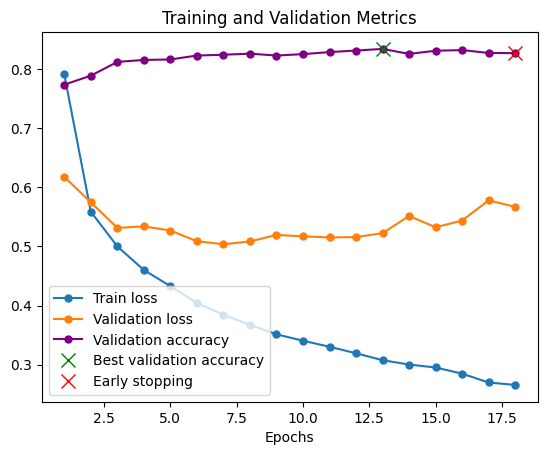

In [387]:
showTrainingProcess()

Z výše uvedeného grafu lze odvodit, že nejlepší výsledek zaznamenal model po 13 epochách. Po 13. epoše zlepšení výsledku nebylo 5 epoch, takže trénink byl zastaven.

Přepočítáme přesnost nejlepšího modelu na validační množině a vypíšeme **Confusion matrix**.

In [388]:
val_predictions = np.zeros(len(val_data))
val_y = np.zeros(len(val_data))
ii = 0

bestModelPerformance(model, ii)

print(f"Validation accuracy of the best model: {FNN_acc:.04f}")

# Confusion matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

100%|██████████| 99/99 [00:00<00:00, 222.83it/s]

Validation accuracy of the best model: 0.8344
[[ 964    5   19   72    5    7  137    0   15    0]
 [   7 1228    8   29    6    2    6    0    2    0]
 [  17    2 1001   15   99    7  111    0    9    0]
 [  35   26   13 1088   51    2   42    0    8    2]
 [   4    4  198   52  880    1   99    0    6    1]
 [   0    0    1    0    0 1143    2   74   20   31]
 [ 214    2  156   37   79    3  738    1   20    2]
 [   0    0    0    0    0   65    0 1139    7   60]
 [  13    1   21    9    4   10   18    7 1165   11]
 [   0    0    0    0    0   37    0   55    3 1167]]


1. Validation Accuracy (Validační přesnost):
    * Celková přesnost ověřování modelu činí přibližně 83,44 %. To znamená, že z testovaných vzorků bylo správně klasifikováno 83,44 % podle svého skutečného oblečení.
2. Confusion Matrix (Matice záměn):
    * Matice záměn poskytuje podrobný pohled na to, jak si model vedl při klasifikaci jednotlivých tříd oblečení (0 až 9).
    * Na diagonále matice jsou hodnoty, které představují počet správně klasifikovaných vzorků pro každou třídu oblečení.
    * Mimo diagonálu jsou hodnoty, které reprezentují chyby klasifikace. Konkrétně sloupce představují předpovídané třídy a řádky skutečné třídy.
    * Je například dobře vidět, že si model nejčastěji plete tričko/top a košili.

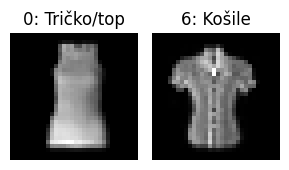

In [450]:
plt.figure(figsize=(3, 3))

plt.subplot(1, 2, 1)
plt.imshow(images[0], cmap='gray')
plt.title("0: Tričko/top")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(images[6], cmap='gray')
plt.title(str("6: Košile"))
plt.axis('off')

plt.tight_layout()
plt.show()

### Dropout

Nyní se pokusíme použít techniku regularizace **Dropout**. Hlavní podstatou této techniky je "odpojení" vstupů do vrstvy, na které je dropout aplikován, takže aby se zabránilo velké ztrátě potenciálně potřebných informací, stojí za to zvětšit síť. Zvětšení v našem případě je zvýšení hloubky modelu a zvýšení počtu neuronů.

In [465]:
class DropoutForwardNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32, 256)
        # self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 16)
        self.fco = nn.Linear(16, 10)
        
        self.dropout = nn.Dropout(p=0.15)
        # self.dropout = nn.Dropout(p=0.25)
        # self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        # x = F.relu(self.fc2(x))
        # x = self.dropout(x) 
        x = F.relu(self.fc3(x))
        x = self.dropout(x)  
        x = F.relu(self.fc4(x))
        # x = self.dropout(x)  
        x = F.relu(self.fc5(x))
        # x = self.dropout(x)
        x = F.relu(self.fc6(x))
        # x = self.dropout(x)
        x = self.fco(x)
        return x
    
model_dropout = DropoutForwardNN().to(device)

In [457]:
optimizer = torch.optim.Adam(model_dropout.parameters())

Proces trénování ->

In [458]:
EPOCHS = 20

# The number of epochs without improvement before deciding to stop the learning process.
K_EPOCHS = 5
early_stopped = False

epochs = []
train_loss = []
validation_loss = []
validation_accuracy = []
best_val_acc = -1
FNN_dropout_acc = None
epochs_from_best = 0


for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch + 1))

    # Indicate training phase
    model_dropout.train(True)

    # One training step
    avg_loss = train_one_epoch(model_dropout, loss_fn, optimizer, train_loader_standard)

    # Indicate evaluation phase
    model_dropout.train(False)

    # Validation performance
    vacc, avg_vloss = validationPerformance(val_loader_standard, model_dropout)

    # collect values
    epochs.append(epoch + 1)
    validation_accuracy.append(vacc)
    validation_loss.append(avg_vloss)
    train_loss.append(avg_loss)

    print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuraccy: {vacc:.3f}")

    # Track the best validation accuracy, and save the model's state
    if vacc > best_val_acc:
        print("Saving best model")
        best_val_acc = vacc
        FNN_dropout_acc = vacc
        model_path = "saves/best_model_dropout.pt"
        os.makedirs(os.path.dirname(model_path), exist_ok=True)
        torch.save(model_dropout.state_dict(), model_path)
        epochs_from_best = 0
    else:
        print("No improvement in this epoch.")
        epochs_from_best += 1

    # EARLY STOPPING
    if epochs_from_best >= K_EPOCHS:
        print("Early stopping now")
        early_stopped = True
        break

EPOCH 1:


100%|██████████| 985/985 [00:05<00:00, 182.23it/s]


TRAIN loss: 0.845, VALIDATION loss: 0.651, accuraccy: 0.755
Saving best model
EPOCH 2:


100%|██████████| 985/985 [00:05<00:00, 179.88it/s]


TRAIN loss: 0.604, VALIDATION loss: 0.576, accuraccy: 0.793
Saving best model
EPOCH 3:


100%|██████████| 985/985 [00:05<00:00, 185.68it/s]


TRAIN loss: 0.547, VALIDATION loss: 0.558, accuraccy: 0.797
Saving best model
EPOCH 4:


100%|██████████| 985/985 [00:05<00:00, 190.41it/s]


TRAIN loss: 0.513, VALIDATION loss: 0.516, accuraccy: 0.813
Saving best model
EPOCH 5:


100%|██████████| 985/985 [00:05<00:00, 176.94it/s]


TRAIN loss: 0.481, VALIDATION loss: 0.526, accuraccy: 0.815
Saving best model
EPOCH 6:


100%|██████████| 985/985 [00:05<00:00, 186.19it/s]


TRAIN loss: 0.464, VALIDATION loss: 0.514, accuraccy: 0.817
Saving best model
EPOCH 7:


100%|██████████| 985/985 [00:05<00:00, 192.06it/s]


TRAIN loss: 0.441, VALIDATION loss: 0.498, accuraccy: 0.827
Saving best model
EPOCH 8:


100%|██████████| 985/985 [00:05<00:00, 180.08it/s]


TRAIN loss: 0.423, VALIDATION loss: 0.485, accuraccy: 0.829
Saving best model
EPOCH 9:


100%|██████████| 985/985 [00:05<00:00, 188.47it/s]


TRAIN loss: 0.414, VALIDATION loss: 0.480, accuraccy: 0.830
Saving best model
EPOCH 10:


100%|██████████| 985/985 [00:05<00:00, 182.28it/s]


TRAIN loss: 0.400, VALIDATION loss: 0.492, accuraccy: 0.828
No improvement in this epoch.
EPOCH 11:


100%|██████████| 985/985 [00:04<00:00, 227.43it/s]


TRAIN loss: 0.393, VALIDATION loss: 0.470, accuraccy: 0.833
Saving best model
EPOCH 12:


100%|██████████| 985/985 [00:03<00:00, 283.84it/s]


TRAIN loss: 0.378, VALIDATION loss: 0.485, accuraccy: 0.830
No improvement in this epoch.
EPOCH 13:


100%|██████████| 985/985 [00:03<00:00, 251.44it/s]


TRAIN loss: 0.372, VALIDATION loss: 0.474, accuraccy: 0.832
No improvement in this epoch.
EPOCH 14:


100%|██████████| 985/985 [00:03<00:00, 250.95it/s]


TRAIN loss: 0.359, VALIDATION loss: 0.469, accuraccy: 0.837
Saving best model
EPOCH 15:


100%|██████████| 985/985 [00:03<00:00, 256.21it/s]


TRAIN loss: 0.357, VALIDATION loss: 0.466, accuraccy: 0.840
Saving best model
EPOCH 16:


100%|██████████| 985/985 [00:03<00:00, 254.03it/s]


TRAIN loss: 0.346, VALIDATION loss: 0.479, accuraccy: 0.837
No improvement in this epoch.
EPOCH 17:


100%|██████████| 985/985 [00:03<00:00, 248.62it/s]


TRAIN loss: 0.336, VALIDATION loss: 0.470, accuraccy: 0.842
Saving best model
EPOCH 18:


100%|██████████| 985/985 [00:03<00:00, 261.66it/s]


TRAIN loss: 0.329, VALIDATION loss: 0.479, accuraccy: 0.840
No improvement in this epoch.
EPOCH 19:


100%|██████████| 985/985 [00:03<00:00, 260.08it/s]


TRAIN loss: 0.327, VALIDATION loss: 0.464, accuraccy: 0.847
Saving best model
EPOCH 20:


100%|██████████| 985/985 [00:03<00:00, 260.34it/s]


TRAIN loss: 0.322, VALIDATION loss: 0.494, accuraccy: 0.835
No improvement in this epoch.


Načteme model s nejlepším výsledkem přesnosti na validační množině.

In [459]:
model_path = "saves/best_model_dropout.pt"
model_dropout.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Vizualizujeme dynamiku změn různých metrik během trénování modelu.

In [460]:
epochs = np.array(epochs)

validation_loss_np = [tensor.cpu().numpy() for tensor in validation_loss]
validation_loss = np.array(validation_loss_np)

validation_accuracy_np = [tensor.cpu().numpy() for tensor in validation_accuracy]
validation_accuracy = np.array(validation_accuracy_np)

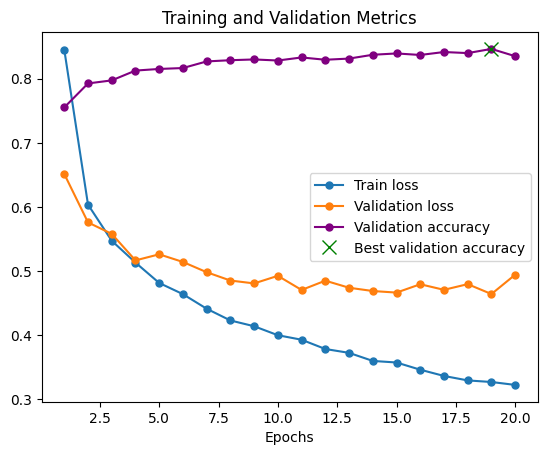

In [461]:
showTrainingProcess()

Z výše uvedeného grafu lze odvodit, že nejlepší výsledek zaznamenal model po 19 epochách.

Přepočítáme přesnost nejlepšího modelu na validační množině a vypíšeme **Confusion matrix**.

In [463]:
val_predictions = np.zeros(len(val_data))
val_y = np.zeros(len(val_data))
ii = 0

bestModelPerformance(model_dropout, ii)

print(f"Validation accuracy of the best model: {FNN_dropout_acc:.04f}")

# Confusion matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

100%|██████████| 99/99 [00:00<00:00, 236.00it/s]

Validation accuracy of the best model: 0.8466
[[ 935    7   17   79   11    2  160    0   13    0]
 [   3 1242    6   28    4    0    4    0    1    0]
 [  12    3  920   14  167    2  135    0    6    2]
 [  19   55   13 1078   52    2   44    0    4    0]
 [   2    8   79   32  998    0  119    0    7    0]
 [   0    0    3    0    0 1158    3   67    8   32]
 [ 162    5  100   46  108    0  811    0   18    2]
 [   0    0    0    0    0   54    0 1143    1   73]
 [   4    1    8   12    8    6   19    6 1190    5]
 [   0    0    1    0    0   29    0   37    3 1192]]


Přesnost 0.8466 po použití **Dropout** naznačuje zlepšení celkových vlastností modelu, jako je jeho schopnost generalizace na nová data a odolnost proti přeučení. Tato změna je spojena s vytvořením více regularizovaného a stabilního modelu.

### Dropout + L1 regularization

Nyní se pokusíme použít i L1 resularizaci.

Proces trénování se od těch předchozích liší jen tím, že při trénování jedné epochy připojíme blok kódu, kde je vlastně implementována regularizace.

In [451]:
model_dropout = DropoutForwardNN().to(device)
optimizer = torch.optim.Adam(model_dropout.parameters())

EPOCHS = 20

# The number of epochs without improvement before deciding to stop the learning process.
K_EPOCHS = 5
early_stopped = False

epochs = []
train_loss = []
validation_loss = []
validation_accuracy = []
best_val_acc = -1
FNN_dropout_lreg_acc = None
epochs_from_best = 0


for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch + 1))

    # Indicate training phase
    model_dropout.train(True)

    # One training step
    avg_loss = train_one_epoch(model_dropout, loss_fn, optimizer, train_loader_standard, lreg=True, l_alpha=0.01)

    # Indicate evaluation phase
    model_dropout.train(False)

    # Validation performance
    vacc, avg_vloss = validationPerformance(val_loader_standard, model_dropout)

    # collect values
    epochs.append(epoch + 1)
    validation_accuracy.append(vacc)
    validation_loss.append(avg_vloss)
    train_loss.append(avg_loss)

    print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuraccy: {vacc:.3f}")

    # Track the best validation accuracy, and save the model's state
    if vacc > best_val_acc:
        print("Saving best model")
        best_val_acc = vacc
        FNN_dropout_lreg_acc = vacc
        model_path = "saves/best_model_dropout_lreg.pt"
        os.makedirs(os.path.dirname(model_path), exist_ok=True)
        torch.save(model_dropout.state_dict(), model_path)
        epochs_from_best = 0
    else:
        print("No improvement in this epoch.")
        epochs_from_best += 1

    # EARLY STOPPING
    if epochs_from_best >= K_EPOCHS:
        print("Early stopping now")
        early_stopped = True
        break

EPOCH 1:


100%|██████████| 985/985 [00:07<00:00, 136.40it/s]


TRAIN loss: 0.958, VALIDATION loss: 0.612, accuraccy: 0.775
Saving best model
EPOCH 2:


100%|██████████| 985/985 [00:06<00:00, 151.71it/s]


TRAIN loss: 0.673, VALIDATION loss: 0.601, accuraccy: 0.786
Saving best model
EPOCH 3:


100%|██████████| 985/985 [00:05<00:00, 169.06it/s]


TRAIN loss: 0.602, VALIDATION loss: 0.547, accuraccy: 0.803
Saving best model
EPOCH 4:


100%|██████████| 985/985 [00:06<00:00, 148.63it/s]


TRAIN loss: 0.557, VALIDATION loss: 0.528, accuraccy: 0.814
Saving best model
EPOCH 5:


100%|██████████| 985/985 [00:06<00:00, 149.70it/s]


TRAIN loss: 0.526, VALIDATION loss: 0.520, accuraccy: 0.812
No improvement in this epoch.
EPOCH 6:


100%|██████████| 985/985 [00:06<00:00, 150.54it/s]


TRAIN loss: 0.492, VALIDATION loss: 0.530, accuraccy: 0.807
No improvement in this epoch.
EPOCH 7:


100%|██████████| 985/985 [00:06<00:00, 149.06it/s]


TRAIN loss: 0.471, VALIDATION loss: 0.499, accuraccy: 0.823
Saving best model
EPOCH 8:


100%|██████████| 985/985 [00:06<00:00, 149.56it/s]


TRAIN loss: 0.453, VALIDATION loss: 0.474, accuraccy: 0.834
Saving best model
EPOCH 9:


100%|██████████| 985/985 [00:06<00:00, 153.44it/s]


TRAIN loss: 0.439, VALIDATION loss: 0.483, accuraccy: 0.828
No improvement in this epoch.
EPOCH 10:


100%|██████████| 985/985 [00:05<00:00, 177.62it/s]


TRAIN loss: 0.423, VALIDATION loss: 0.482, accuraccy: 0.835
Saving best model
EPOCH 11:


100%|██████████| 985/985 [00:05<00:00, 171.45it/s]


TRAIN loss: 0.411, VALIDATION loss: 0.500, accuraccy: 0.826
No improvement in this epoch.
EPOCH 12:


100%|██████████| 985/985 [00:06<00:00, 153.82it/s]


TRAIN loss: 0.399, VALIDATION loss: 0.469, accuraccy: 0.833
No improvement in this epoch.
EPOCH 13:


100%|██████████| 985/985 [00:06<00:00, 162.31it/s]


TRAIN loss: 0.391, VALIDATION loss: 0.488, accuraccy: 0.830
No improvement in this epoch.
EPOCH 14:


100%|██████████| 985/985 [00:06<00:00, 161.71it/s]


TRAIN loss: 0.376, VALIDATION loss: 0.487, accuraccy: 0.835
Saving best model
EPOCH 15:


100%|██████████| 985/985 [00:05<00:00, 164.45it/s]


TRAIN loss: 0.366, VALIDATION loss: 0.472, accuraccy: 0.837
Saving best model
EPOCH 16:


100%|██████████| 985/985 [00:06<00:00, 159.65it/s]


TRAIN loss: 0.361, VALIDATION loss: 0.471, accuraccy: 0.833
No improvement in this epoch.
EPOCH 17:


100%|██████████| 985/985 [00:06<00:00, 157.46it/s]


TRAIN loss: 0.353, VALIDATION loss: 0.484, accuraccy: 0.839
Saving best model
EPOCH 18:


100%|██████████| 985/985 [00:06<00:00, 161.25it/s]


TRAIN loss: 0.350, VALIDATION loss: 0.502, accuraccy: 0.830
No improvement in this epoch.
EPOCH 19:


100%|██████████| 985/985 [00:06<00:00, 160.01it/s]


TRAIN loss: 0.340, VALIDATION loss: 0.489, accuraccy: 0.840
Saving best model
EPOCH 20:


100%|██████████| 985/985 [00:06<00:00, 160.03it/s]


TRAIN loss: 0.333, VALIDATION loss: 0.484, accuraccy: 0.844
Saving best model


Načteme model s nejlepším výsledkem přesnosti na validační množině.

In [452]:
model_path = "saves/best_model_dropout_lreg.pt"
model_dropout.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Vizualizujeme dynamiku změn různých metrik během trénování modelu.

In [453]:
epochs = np.array(epochs)

validation_loss_np = [tensor.cpu().numpy() for tensor in validation_loss]
validation_loss = np.array(validation_loss_np)

validation_accuracy_np = [tensor.cpu().numpy() for tensor in validation_accuracy]
validation_accuracy = np.array(validation_accuracy_np)

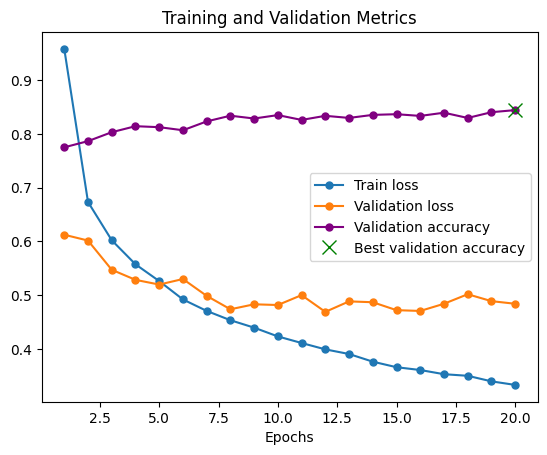

In [454]:
showTrainingProcess()

Z výše uvedeného grafu lze odvodit, že nejlepší výsledek zaznamenal model po 20 epochách.

Přepočítáme přesnost nejlepšího modelu na validační množině a vypíšeme **Confusion matrix**.

In [455]:
val_predictions = np.zeros(len(val_data))
val_y = np.zeros(len(val_data))
ii = 0

bestModelPerformance(model_dropout, ii)

print(f"Validation accuracy of the best model: {FNN_dropout_lreg_acc:.04f}")

# Confusion matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

100%|██████████| 99/99 [00:00<00:00, 428.81it/s]

Validation accuracy of the best model: 0.8441
[[1060    3   13   47    9    6   64    0   21    1]
 [   7 1230    3   37    4    0    6    0    1    0]
 [  25    0  949   12  141    6  118    0    8    2]
 [  58   19    8 1055   75    1   37    1   12    1]
 [   3    3   96   32 1010    0   94    0    7    0]
 [   0    0    0    0    0 1116    2   89    9   55]
 [ 310    0  102   27  105    1  683    0   22    2]
 [   0    0    0    0    0   33    0 1158    3   77]
 [  10    0    4    5   11    7   13   14 1184   11]
 [   0    0    0    0    0   23    0   45    3 1191]]


* Na základě výsledků lze dospět k závěru, že regularizace L1 příliš nepomohla zlepšit přesnost modelu a dokonce jej snížila. 
* Po experimentech s hodnotou hyperparametru `l_alpha` se ukázalo, že model se nejlépe osvědčil s nejmenší hodnotou parametru (0.01), což lze v zásadě přirovnat k tomu, že regularizace nebyla vůbec provedena.
* Proto tuto regularizaci nebudeme provádět.

## Convolutional Network

Výhody modelu:
1. Obecně jsou konvoluční sítě velmi úspěšné modely pro obrázková data.
2. Konvoluční sítě jsou schopny efektivně identifikovat lokální vzory a detaily v obrazech díky konvolučním vrstvám, které používají malé filtry k provádění konvoluce přes obrázky. Tato schopnost umožňuje síti rozpoznat různé prvky a vlastnosti v různých částech obrázků.

Po vyzkoušení různých možností hloubky a počtu neuronů v každé vrstvě jsme dospěli k modelu, který má následující architekturu:
* Vstupní data jsou předána sérii **konvolučních vrstev** (conv1 a conv2), po každé vrstvě následuje **max pooling** vrstva (pool1 a pool2), která snižuje rozměry dat.
* Následuje postupně **fully connected** vrstvy (fc0, fc1, fc2, fc3) s **ReLU** aktivací.
* Výstupní vrstva (fco) poskytuje výstupní skóre pro jednotlivé třídy (10 tříd).

In [464]:
class ConvNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        # self.conv3 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3)
        # self.pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc0 = nn.Linear(1152, 512)
        self.fc1 = nn.Linear(512, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fco = nn.Linear(16, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        # print(x.shape)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        # print(x.shape)
        # x = F.relu(self.conv3(x))
        # x = self.pool3(x)
        x = x.flatten(start_dim = 1)
        # print(x.shape)
        x = F.relu(self.fc0(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fco(x)
        return x
    
model_conv = ConvNN().to(device)

V případě tohoto modelu opět vítězí metoda optimalizace `Adam`.

In [402]:
optimizer = torch.optim.Adam(model_conv.parameters())
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Proces trénování ->

In [403]:
EPOCHS = 20

# The number of epochs without improvement before deciding to stop the learning process.
K_EPOCHS = 5
early_stopped = False

epochs = []
train_loss = []
validation_loss = []
validation_accuracy = []
best_val_acc = -1
CNN_acc = None
epochs_from_best = 0


for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch + 1))

    # Indicate training phase
    model_conv.train(True)

    # One training step
    avg_loss = train_one_epoch(model_conv, loss_fn, optimizer, train_loader_standard)

    # Indicate evaluation phase
    model_conv.train(False)

    # Validation performance
    vacc, avg_vloss = validationPerformance(val_loader_standard, model_conv)

    # collect values
    epochs.append(epoch + 1)
    validation_accuracy.append(vacc)
    validation_loss.append(avg_vloss)
    train_loss.append(avg_loss)

    print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuraccy: {vacc:.3f}")

    # Track the best validation accuracy, and save the model's state
    if vacc > best_val_acc:
        print("Saving best model")
        best_val_acc = vacc
        CNN_acc = vacc
        model_path = "saves/best_model_conv.pt"
        os.makedirs(os.path.dirname(model_path), exist_ok=True)
        torch.save(model_conv.state_dict(), model_path)
        epochs_from_best = 0
    else:
        print("No improvement in this epoch.")
        epochs_from_best += 1

    # EARLY STOPPING
    if epochs_from_best >= K_EPOCHS:
        print("Early stopping now")
        early_stopped = True
        break

EPOCH 1:


100%|██████████| 985/985 [00:06<00:00, 143.10it/s]


TRAIN loss: 0.733, VALIDATION loss: 0.545, accuraccy: 0.802
Saving best model
EPOCH 2:


100%|██████████| 985/985 [00:07<00:00, 140.16it/s]


TRAIN loss: 0.459, VALIDATION loss: 0.440, accuraccy: 0.842
Saving best model
EPOCH 3:


100%|██████████| 985/985 [00:06<00:00, 144.63it/s]


TRAIN loss: 0.379, VALIDATION loss: 0.390, accuraccy: 0.860
Saving best model
EPOCH 4:


100%|██████████| 985/985 [00:07<00:00, 137.10it/s]


TRAIN loss: 0.329, VALIDATION loss: 0.398, accuraccy: 0.862
Saving best model
EPOCH 5:


100%|██████████| 985/985 [00:07<00:00, 130.49it/s]


TRAIN loss: 0.292, VALIDATION loss: 0.380, accuraccy: 0.873
Saving best model
EPOCH 6:


100%|██████████| 985/985 [00:07<00:00, 133.22it/s]


TRAIN loss: 0.262, VALIDATION loss: 0.369, accuraccy: 0.871
No improvement in this epoch.
EPOCH 7:


100%|██████████| 985/985 [00:07<00:00, 135.88it/s]


TRAIN loss: 0.230, VALIDATION loss: 0.380, accuraccy: 0.868
No improvement in this epoch.
EPOCH 8:


100%|██████████| 985/985 [00:06<00:00, 146.63it/s]


TRAIN loss: 0.207, VALIDATION loss: 0.357, accuraccy: 0.883
Saving best model
EPOCH 9:


100%|██████████| 985/985 [00:06<00:00, 145.67it/s]


TRAIN loss: 0.183, VALIDATION loss: 0.420, accuraccy: 0.875
No improvement in this epoch.
EPOCH 10:


100%|██████████| 985/985 [00:06<00:00, 141.72it/s]


TRAIN loss: 0.154, VALIDATION loss: 0.447, accuraccy: 0.873
No improvement in this epoch.
EPOCH 11:


100%|██████████| 985/985 [00:06<00:00, 143.37it/s]


TRAIN loss: 0.135, VALIDATION loss: 0.442, accuraccy: 0.875
No improvement in this epoch.
EPOCH 12:


100%|██████████| 985/985 [00:07<00:00, 134.12it/s]


TRAIN loss: 0.119, VALIDATION loss: 0.473, accuraccy: 0.871
No improvement in this epoch.
EPOCH 13:


100%|██████████| 985/985 [00:06<00:00, 142.14it/s]


TRAIN loss: 0.105, VALIDATION loss: 0.524, accuraccy: 0.876
No improvement in this epoch.
Early stopping now


Načteme model s nejlepším výsledkem přesnosti na validační množině.

In [404]:
model_path = "saves/best_model_conv.pt"
model_conv.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Vizualizujeme dynamiku změn různých metrik během trénování modelu.

In [405]:
epochs = np.array(epochs)

validation_loss_np = [tensor.cpu().numpy() for tensor in validation_loss]
validation_loss = np.array(validation_loss_np)

validation_accuracy_np = [tensor.cpu().numpy() for tensor in validation_accuracy]
validation_accuracy = np.array(validation_accuracy_np)

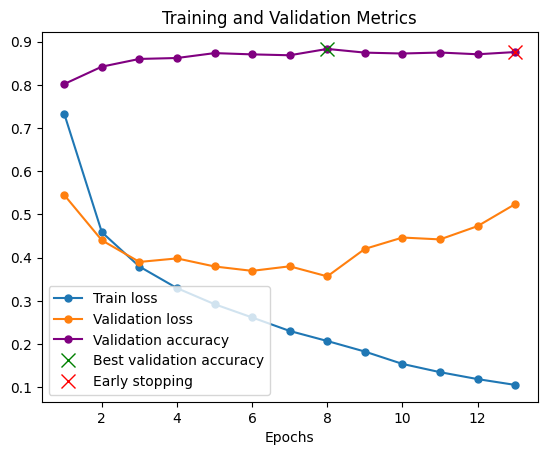

In [406]:
showTrainingProcess()

Z výše uvedeného grafu lze odvodit, že nejlepší výsledek zaznamenal model po 8 epochách. Po 8. epoše zlepšení výsledku nebylo 5 epoch, takže trénink byl zastaven.

Přepočítáme přesnost nejlepšího modelu na validační množině a vypíšeme **Confusion matrix**.

In [407]:
val_predictions = np.zeros(len(val_data))
val_y = np.zeros(len(val_data))
ii = 0

bestModelPerformance(model_conv, ii)

print(f"Validation accuracy of the best model: {CNN_acc:.04f}")

# Confusion matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

100%|██████████| 99/99 [00:00<00:00, 215.57it/s]

Validation accuracy of the best model: 0.8832
[[1030    1   20   54    3    3   99    0   14    0]
 [   6 1247    3   27    3    0    2    0    0    0]
 [  27    1 1042   16  104    2   64    0    5    0]
 [  31    5   10 1158   29    0   28    0    6    0]
 [   2    1   80   51 1041    0   68    0    2    0]
 [   0    0    0    0    2 1191    1   45    3   29]
 [ 188    1   97   48  121    0  780    0   17    0]
 [   0    0    0    0    0   14    0 1211    0   46]
 [   6    2    6   12    5    2    4    2 1220    0]
 [   0    0    0    2    0    6    0   43    3 1208]]


* Vysoká validační přesnost konvoluční sítě (0.8832) naznačuje, že tento model překonává výsledky sítě typu ForwardNN, která byla dříve testována a dosahovala nižší přesnosti. 
* Konvoluční síť je schopna lépe extrahovat užitečné příznaky z obrázků, což vede k vylepšené schopnosti rozpoznávání a klasifikace oblečení ve srovnání s jednoduššími sítěmi jako ForwardNN.

### Dropout

Nyní se pokusíme integrovat do modelu regularizační techniku **Dropout**. Po vyzkoušení několika variant se ukázalo, že model s nejvyšší validační přesností je ten, který:

* Používá metodu `nn.Dropout2d` pro výstupy konvolučních vrstev.
* Pro výstupy první plně propojené vrstvy, která má nejvíce "out_features", používá obecnou verzi dropoutu (`nn.Dropout`).

In [570]:
class DropoutConvNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc0 = nn.Linear(1152, 512)
        self.fc1 = nn.Linear(512, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fco = nn.Linear(16, 10)
        
        self.conv_drop = nn.Dropout2d(p=0.2)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.conv_drop(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.conv_drop(x)
        x = x.flatten(start_dim = 1)
        x = F.relu(self.fc0(x))
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        # x = self.dropout(x)
        x = F.relu(self.fc2(x))
        # x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fco(x)
        return x
    
model_conv_dropout = DropoutConvNN().to(device)

In [571]:
optimizer = torch.optim.Adam(model_conv_dropout.parameters())

Proces trénování ->

In [572]:
EPOCHS = 20

# The number of epochs without improvement before deciding to stop the learning process.
K_EPOCHS = 5
early_stopped = False

epochs = []
train_loss = []
validation_loss = []
validation_accuracy = []
best_val_acc = -1
CNN_dropout_acc = None
epochs_from_best = 0


for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch + 1))

    # Indicate training phase
    model_conv_dropout.train(True)

    # One training step
    avg_loss = train_one_epoch(model_conv_dropout, loss_fn, optimizer, train_loader_standard)

    # Indicate evaluation phase
    model_conv_dropout.train(False)

    # Validation performance
    vacc, avg_vloss = validationPerformance(val_loader_standard, model_conv_dropout)

    # collect values
    epochs.append(epoch + 1)
    validation_accuracy.append(vacc)
    validation_loss.append(avg_vloss)
    train_loss.append(avg_loss)

    print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuraccy: {vacc:.3f}")

    # Track the best validation accuracy, and save the model's state
    if vacc > best_val_acc:
        print("Saving best model")
        best_val_acc = vacc
        CNN_dropout_acc = vacc
        model_path = "saves/best_model_conv_dropout.pt"
        os.makedirs(os.path.dirname(model_path), exist_ok=True)
        torch.save(model_conv_dropout.state_dict(), model_path)
        epochs_from_best = 0
    else:
        print("No improvement in this epoch.")
        epochs_from_best += 1

    # EARLY STOPPING
    if epochs_from_best >= K_EPOCHS:
        print("Early stopping now")
        early_stopped = True
        break

EPOCH 1:


100%|██████████| 985/985 [00:04<00:00, 202.19it/s]


TRAIN loss: 0.798, VALIDATION loss: 0.562, accuraccy: 0.785
Saving best model
EPOCH 2:


100%|██████████| 985/985 [00:04<00:00, 229.42it/s]


TRAIN loss: 0.524, VALIDATION loss: 0.462, accuraccy: 0.829
Saving best model
EPOCH 3:


100%|██████████| 985/985 [00:04<00:00, 224.72it/s]


TRAIN loss: 0.447, VALIDATION loss: 0.421, accuraccy: 0.850
Saving best model
EPOCH 4:


100%|██████████| 985/985 [00:05<00:00, 188.45it/s]


TRAIN loss: 0.404, VALIDATION loss: 0.396, accuraccy: 0.859
Saving best model
EPOCH 5:


100%|██████████| 985/985 [00:05<00:00, 187.92it/s]


TRAIN loss: 0.369, VALIDATION loss: 0.374, accuraccy: 0.867
Saving best model
EPOCH 6:


100%|██████████| 985/985 [00:04<00:00, 237.37it/s]


TRAIN loss: 0.347, VALIDATION loss: 0.357, accuraccy: 0.875
Saving best model
EPOCH 7:


100%|██████████| 985/985 [00:04<00:00, 245.36it/s]


TRAIN loss: 0.322, VALIDATION loss: 0.344, accuraccy: 0.876
Saving best model
EPOCH 8:


100%|██████████| 985/985 [00:04<00:00, 228.48it/s]


TRAIN loss: 0.305, VALIDATION loss: 0.343, accuraccy: 0.880
Saving best model
EPOCH 9:


100%|██████████| 985/985 [00:04<00:00, 232.22it/s]


TRAIN loss: 0.290, VALIDATION loss: 0.344, accuraccy: 0.876
No improvement in this epoch.
EPOCH 10:


100%|██████████| 985/985 [00:05<00:00, 186.49it/s]


TRAIN loss: 0.275, VALIDATION loss: 0.352, accuraccy: 0.877
No improvement in this epoch.
EPOCH 11:


100%|██████████| 985/985 [00:04<00:00, 213.24it/s]


TRAIN loss: 0.263, VALIDATION loss: 0.368, accuraccy: 0.873
No improvement in this epoch.
EPOCH 12:


100%|██████████| 985/985 [00:04<00:00, 222.43it/s]


TRAIN loss: 0.254, VALIDATION loss: 0.339, accuraccy: 0.884
Saving best model
EPOCH 13:


100%|██████████| 985/985 [00:04<00:00, 235.19it/s]


TRAIN loss: 0.239, VALIDATION loss: 0.341, accuraccy: 0.882
No improvement in this epoch.
EPOCH 14:


100%|██████████| 985/985 [00:04<00:00, 227.67it/s]


TRAIN loss: 0.226, VALIDATION loss: 0.352, accuraccy: 0.883
No improvement in this epoch.
EPOCH 15:


100%|██████████| 985/985 [00:04<00:00, 201.58it/s]


TRAIN loss: 0.224, VALIDATION loss: 0.339, accuraccy: 0.887
Saving best model
EPOCH 16:


100%|██████████| 985/985 [00:06<00:00, 161.64it/s]


TRAIN loss: 0.209, VALIDATION loss: 0.347, accuraccy: 0.886
No improvement in this epoch.
EPOCH 17:


100%|██████████| 985/985 [00:04<00:00, 213.15it/s]


TRAIN loss: 0.200, VALIDATION loss: 0.360, accuraccy: 0.886
No improvement in this epoch.
EPOCH 18:


100%|██████████| 985/985 [00:04<00:00, 223.55it/s]


TRAIN loss: 0.196, VALIDATION loss: 0.355, accuraccy: 0.886
No improvement in this epoch.
EPOCH 19:


100%|██████████| 985/985 [00:04<00:00, 237.47it/s]


TRAIN loss: 0.184, VALIDATION loss: 0.360, accuraccy: 0.889
Saving best model
EPOCH 20:


100%|██████████| 985/985 [00:04<00:00, 224.36it/s]


TRAIN loss: 0.179, VALIDATION loss: 0.365, accuraccy: 0.883
No improvement in this epoch.


Načteme model s nejlepším výsledkem přesnosti na validační množině.

In [573]:
model_path = "saves/best_model_conv_dropout.pt"
model_conv_dropout.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Vizualizujeme dynamiku změn různých metrik během trénování modelu.

In [574]:
epochs = np.array(epochs)

validation_loss_np = [tensor.cpu().numpy() for tensor in validation_loss]
validation_loss = np.array(validation_loss_np)

validation_accuracy_np = [tensor.cpu().numpy() for tensor in validation_accuracy]
validation_accuracy = np.array(validation_accuracy_np)

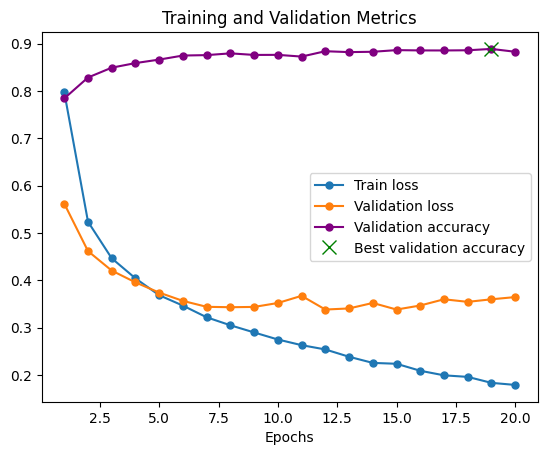

In [575]:
showTrainingProcess()

Z výše uvedeného grafu lze odvodit, že nejlepší výsledek zaznamenal model po 19 epochách.

Přepočítáme přesnost nejlepšího modelu na validační množině a vypíšeme **Confusion matrix**.

In [576]:
val_predictions = np.zeros(len(val_data))
val_y = np.zeros(len(val_data))
ii = 0

bestModelPerformance(model_conv_dropout, ii)

print(f"Validation accuracy of the best model: {CNN_dropout_acc:.04f}")

# Confusion matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

100%|██████████| 99/99 [00:00<00:00, 326.89it/s]

Validation accuracy of the best model: 0.8891
[[1017    1   10   56    4    5  120    0   11    0]
 [   2 1241    1   39    1    0    4    0    0    0]
 [  23    2 1042   16   72    2  104    0    0    0]
 [  19    2   11 1171   30    0   32    0    2    0]
 [   2    2   98   43 1003    1   93    0    1    2]
 [   0    0    1    0    0 1214    0   35    2   19]
 [ 170    1   78   43   76    0  875    0    9    0]
 [   0    0    0    0    0   18    0 1214    0   39]
 [   2    2    6    9    4    3    8    3 1219    3]
 [   0    1    0    0    0    9    0   44    1 1207]]


* Výsledky validační přesnosti (88.91%) naznačují, že zapojení **dropoutu** bylo výhodné a vedlo k získání nejlepšího modelu v našem kontextu. 
* Tento fakt potvrzuje i matice záměn, která vykazuje vyšší hodnoty na hlavní diagonále (kde jsou správně klasifikované instance) a nižší hodnoty mimo ni (kde jsou chybně klasifikované instance).

## Final model

Sestavíme tabulku, která názorně ukáže výsledky přesnosti predikce na validační množině u každého modelu.

In [577]:
table = {
    'Model' : ['ForwardNN', 'ConvolutionalNN'],
    'Original' : [FNN_acc.cpu().item(), CNN_acc.cpu().item()],
    'Dropout' : [FNN_dropout_acc.cpu().item(), CNN_dropout_acc.cpu().item()],
    'Dropout + L1': [FNN_dropout_lreg_acc.cpu().item(), None]
}

Accuracy = pd.DataFrame(table)
print(round(Accuracy, 2))

             Model  Original  Dropout  Dropout + L1
0        ForwardNN      0.83     0.85          0.84
1  ConvolutionalNN      0.88     0.89           NaN


Z tabulky je vidět, že nejlepším modelem je model **ConvolutionalNN**, který byl aplikován v kombinaci s technikou regularizace **Dropout**.

In [578]:
final_model = model_conv_dropout

Nakonec můžeme natrénovat finální model a zjistit předpokládanou přesnost klasifikace nových obrázků.

In [580]:
test_predictions = np.zeros(len(test_data))
test_y = np.zeros(len(test_data))
ii = 0
for tdata in tqdm(test_loader_standard):
    tinputs, tlabels = tdata
    tinputs, tlabels = tinputs.to(device), tlabels.to(device)
    with torch.no_grad():
        toutputs = final_model(tinputs)
    test_predictions[ii:(ii + tinputs.shape[0])] = toutputs.argmax(1).cpu().numpy()
    test_y[ii:(ii + tinputs.shape[0])] = tlabels.cpu().numpy()
    ii += tinputs.shape[0]

print(f"Expected accuracy on new data (test): {accuracy_score(test_y, test_predictions):.02f}")

100%|██████████| 66/66 [00:00<00:00, 162.79it/s]

Expected accuracy on new data (test): 0.89


Poslední kroky:
1. Připravíme data z datasetu `evaluate.csv` 
2. Pomocí finálního modelu klasifikujeme obrázky. 
3. Výsledek zapíšeme do souboru `results.csv`. 
4. Uložíme finální model do souboru `saves/final_model.pt`.

In [581]:
evaluate = pd.read_csv("evaluate.csv")

# Transform evaluate data using the fitted scaler
evaluate_scaled = standard_scaler.transform(evaluate.drop(columns = 'ID'))

evaluate_scaled = evaluate_scaled.reshape(-1, 1, 32, 32)
evaluate_scaled = torch.tensor(evaluate_scaled, dtype=torch.float)
evaluate_scaled = torch.utils.data.TensorDataset(evaluate_scaled)
eval_loader = torch.utils.data.DataLoader(evaluate_scaled, batch_size=128, shuffle=False)

In [586]:
predictions = np.zeros(len(evaluate_scaled))
ii = 0
for data in tqdm(eval_loader):
    inputs = data[0].to(device)
    with torch.no_grad():
        outputs = final_model(inputs)
    predictions[ii:(ii + inputs.shape[0])] = outputs.argmax(1).cpu().numpy()
    ii += inputs.shape[0]

100%|██████████| 137/137 [00:00<00:00, 218.72it/s]


In [587]:
results = pd.DataFrame({'ID': evaluate.iloc[:, 0], 'label': predictions})
results["label"] = results["label"].astype(int)
results.to_csv('results.csv', index=False)

In [588]:
torch.save(final_model.state_dict(), "saves/final_model.pt")

Vypíšeme výsledky předpovědí každého labelu finálním modelem.

In [589]:
value_counts = results['label'].value_counts()
value_counts.sort_index(inplace=True)
for value, count in value_counts.items():
    print(f"Label: {value}, Count: {count}")

Label: 0, Count: 1761
Label: 1, Count: 1770
Label: 2, Count: 1814
Label: 3, Count: 1865
Label: 4, Count: 1730
Label: 5, Count: 1690
Label: 6, Count: 1668
Label: 7, Count: 1754
Label: 8, Count: 1712
Label: 9, Count: 1736
